# Statistical Analysis in Python

This workshop is an introduction to Statistical Analysis in Python

It is NOT an introduction to Python workshop, I assume a working knowlege of the language

It is NOT an introduction to statisics workshop

Rather, this workshop is designed to show you the tools and basic process to get started on your own. It covers:

* Using Pandas to load in and manipulate data
* Using numpy for the many tools it has to work with our data
* Visualizing data with Seaborn

This will be done by following a basic proccess to analyze data, but why do we do this process?

In [1]:
# Import the tools we will be using

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

Python is great for scripting, this means we can easily and quickly prepare and manipulate data, but data analysis and modeling require some work, this is where Pandas comes in. It gives python a similar power to a language like R designed for statistics.

## Understanding the Data

### Pandas

"Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language." - [Pandas Website](pandas.pydata.org)

Python doesnt support vectors, matricies, or dataframes out of the box, this is what Pandas is for. Its numpy, but better.

##### How do we store and represent data?
Generally, the standard is a Comma-Seperated Values file, or CSV. Excel and Google Sheets can import and export them. As the name suggests, each line is a row, and each column is seperated by a comma.

In [2]:
# Load in some data

tips_ds = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

# This loads in our data as a DataFrame object, labeled columns and rows
# A DataFrame is a 2D mutable data structure, so we can view it as a table

print(type(tips_ds))
print(tips_ds)

<class 'pandas.core.frame.DataFrame'>
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


The data we are using is relatively straight forward, its called "tips"
lets take a look at what we have. Our first row is just an individual patron to this store. So, each of our colums for each patron is:
* `total_bill`: FLOAT The final bill at this store
* `tip`: FLOAT the size of the tip that was left
* `sex`: STRING the sex of the patron
* `smoker`: STRING if the person smoked or not
* `day`: STRING the day of the week of the visit
* `time`: STRING if the visit was for lunch or dinner
* `size`: INT the size of the group that came in

A long list of numbers and strings is pretty meaningless to us, so lets see what we info we can gleam from plotting our data.

In [3]:
print(tips_ds.size)
print(tips_ds.shape)
print(tips_ds.index)
print(tips_ds.columns)
print(tips_ds.dtypes)
print(tips_ds.empty)

1708
(244, 7)
RangeIndex(start=0, stop=244, step=1)
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object
False


### Seaborn

"Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics." - [Seaborn website](https://seaborn.pydata.org)

Seaborn is designed to work with Pandas. Its dataset-oriented and helps us look for relationships between multiple variables. Its built on top of matplotlib to make good looking vizualizations for the purpose of data analysis.

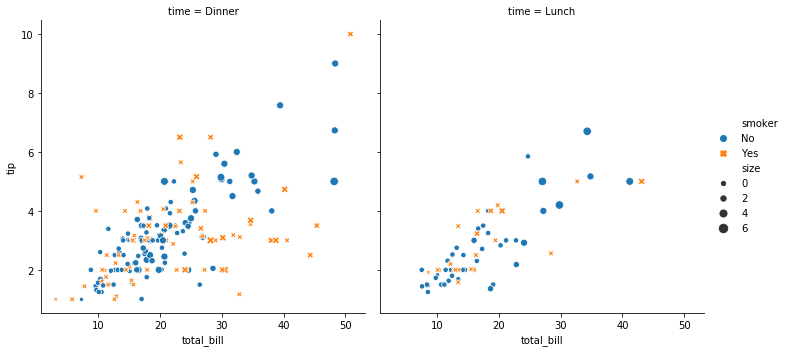

In [6]:
sns.relplot(x="total_bill", y="tip", col="time", hue="smoker", style="smoker", size="size", data=tips_ds)

We packed a lot of information in this plot, breaking it down:
* along the x axis we have the size of our bill
* along the y axis we have the size of our tip
* we have two columns of charts, on the left, people that came in during dinner, on the right, for lunch
* dots are non-smokers, Xs are smokers
* size of the dot is the size of the party

[`seaborn.relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot) gives us a relational plot that we can make either a scatter plot (default) or a line plot

At this point we have a rough idea about what our data is, but lets use Pandas again to get some more info out of it.

### Descriptive Statistics

In [7]:
tips_ds.sum()

total_bill                                              4827.77
tip                                                      731.58
sex           FemaleMaleMaleMaleFemaleMaleMaleMaleMaleMaleMa...
smoker        NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
day           SunSunSunSunSunSunSunSunSunSunSunSunSunSunSunS...
time          DinnerDinnerDinnerDinnerDinnerDinnerDinnerDinn...
size                                                        627
dtype: object

We added the numbers correctly, but we ended up concatenating the strings... Lets try it again, one column at a time. To do that we need to be able to access a column.

In [8]:
tips_ds.total_bill
tips_ds["total_bill"]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

Both of this work in getting data, but we need to use `tips_ds["total_bill"]` if we want to reassign data.

In [9]:
print("Num patrons: {}".format(tips_ds.total_bill.count()))
print("Total Money (no tips): {}".format(tips_ds.total_bill.sum()))
print("Total Tips: {}".format(tips_ds.tip.sum()))
print("Avg Party Size: {}".format(tips_ds.size.mean()))
print("Bill/Tip covariance: {}".format(tips_ds.total_bill.cov(tips_ds.tip)))

Num patrons: 244
Total Money (no tips): 4827.77
Total Tips: 731.5799999999999
Avg Party Size: 1708.0
Bill/Tip covariance: 8.323501629224856


or we can just be lazy

In [10]:
tips_ds.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


This formatting is maintained when copy pasting into Microsoft Word

Pandas has support for:
* `dataframe.count()` Number of non-null observations
* `dataframe.sum()` Sum of Values
* `dataframe.mean()` Mean/Average
* `dataframe.median()` Median
* `dataframe.min()` Minimum
* `dataframe.max()` Maximum
* `dataframe.std()` Corrected standard deviation
* `dataframe.var()` Unbiased Variance
* `dataframe.skew()` Skewness
* `dataframe.kurt()` Kurtosis
* `dataframe.quantile()` Sample Quantile
* `dataframe.cov()` Covariance
* `dataframe.corr()` Correlation

* `dataframe.apply()` we write our own function that takes in a numpy ndarray and pass that in

In [12]:
def square_root(nd_input):
    return np.sqrt(nd_input)
    

print(tips_ds.total_bill)    
print(tips_ds.total_bill.apply(square_root))
# tips_ds["total_bill"].apply(np.sqrt) # this also works

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64
0      4.121893
1      3.215587
2      4.583667
3      4.866210
4      4.958831
         ...   
239    5.387950
240    5.213444
241    4.761302
242    4.221374
243    4.333590
Name: total_bill, Length: 244, dtype: float64


If we have time based data, Pandas can also do all the calculations for a rolling window, as opposed to just a series of data.

Theres so much more pandas can calculate, check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/resampling.html#computations-descriptive-stats) and scroll down to the "Computations / descriptive stats" section

but Pandas lets us do more than just get information out of our data. It lets us manipulate our data, easily removing cols, to reordering, etc. 

for illustrative purposes, before we start messing with the data, lets make a copy

### Messing with the Data

In [13]:
tips = tips_ds.copy()
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


adding a total_charge (total_bill + tips)

In [14]:
tips.insert(len(tips.columns), "total_charge", tips.total_bill + tips.tip)
tips

,total_bill,tip,sex,smoker,day,time,size,total_charge
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,34.95
240,27.18,2.00,Female,Yes,Sat,Dinner,2,29.18
241,22.67,2.00,Male,Yes,Sat,Dinner,2,24.67
242,17.82,1.75,Male,No,Sat,Dinner,2,19.57


Lets say our data is too big. If we were trying to use this data for machine learning, we'd take a look at variance and covariance and purge what gives us the least amount of information gain. But lets just remove 'time' for now.

In [15]:
cols = tips.columns.tolist()
print(cols)
cols.remove('time')
print(cols)
tips = tips[cols]
tips

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'total_charge']
['total_bill', 'tip', 'sex', 'smoker', 'day', 'size', 'total_charge']


,total_bill,tip,sex,smoker,day,size,total_charge
0,16.99,1.01,Female,No,Sun,2,18.00
1,10.34,1.66,Male,No,Sun,3,12.00
2,21.01,3.50,Male,No,Sun,3,24.51
3,23.68,3.31,Male,No,Sun,2,26.99
4,24.59,3.61,Female,No,Sun,4,28.20
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,3,34.95
240,27.18,2.00,Female,Yes,Sat,2,29.18
241,22.67,2.00,Male,Yes,Sat,2,24.67
242,17.82,1.75,Male,No,Sat,2,19.57


now lets sort by total_bill size, then party size, then tip

In [20]:
#tips = tips.sort_values(["total_bill","size","tip"], ascending=[True, True, True])
print(tips)

     total_bill   tip smoker     sex
111        7.25  1.00     No  Female
145        8.35  1.50     No  Female
135        8.51  1.25     No  Female
82        10.07  1.83     No  Female
51        10.29  2.60     No  Female
136       10.33  2.00     No  Female
16        10.33  1.67     No  Female
117       10.65  1.50     No  Female
132       11.17  1.50     No  Female
128       11.38  2.00     No  Female
147       11.87  1.63     No  Female
133       12.26  2.00     No  Female
118       12.43  1.80     No  Female
124       12.48  2.52     No  Female
139       13.16  2.75     No  Female
158       13.39  2.61     No  Female
121       13.42  1.68     No  Female
137       14.15  2.00     No  Female
127       14.52  2.00     No  Female
74        14.73  2.20     No  Female
14        14.83  3.02     No  Female
32        15.06  3.00     No  Female
22        15.77  2.23     No  Female
223       15.98  3.00     No  Female
162       16.21  2.00     No  Female
144       16.43  2.30     No  Female
6

Finally, lets just grab data about tips non-smoking, female customers
We also only want to display their total_bill and tip, then lets just limit displaying it to the first 10.

In [17]:
tips = tips.loc[(tips.smoker == "No") & (tips.sex == "Female"), ['total_bill', 'tip', 'smoker', 'sex']]
tips.head(10)

,total_bill,tip,smoker,sex
111,7.25,1.00,No,Female
145,8.35,1.50,No,Female
135,8.51,1.25,No,Female
82,10.07,1.83,No,Female
51,10.29,2.60,No,Female
136,10.33,2.00,No,Female
16,10.33,1.67,No,Female
117,10.65,1.50,No,Female
132,11.17,1.50,No,Female
128,11.38,2.00,No,Female


Now we know how to manipulate our data. Pandas can do so much more, from merging data sets, reshaping, transposing,  etc. Whenever you need to so something its worth giving the [API reference](https://pandas.pydata.org/pandas-docs/stable/index.html#) a quick scan.

Pandas can even do some visualizations, but Seaborn is super simple and the little bit of extra verbosity gives you a lot more power.

## Visualizations

At this point we can explore our data, we've even made some visualizations to try and understand our data.
Relationships between features is a lot harder with a chart, so next we'll explore how to make visualizations to analyze those relationships.

First off...

## Distributions

We want to start visualizing our data to get more information out of it, we've already plotted all the information together, so now we want to start probing for relationships.

Lets take a look at distrobutions with the histogram.

we can use a distribution plot, "sns.displot()"
we can get a kernel density function, or even try to get a general shape of our KDF.

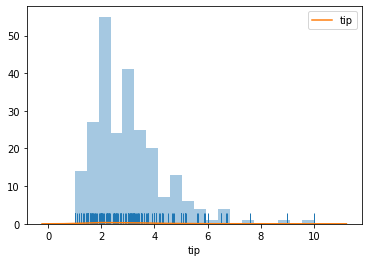

In [23]:
sns.distplot(tips_ds["tip"], bins=20, kde=False, rug=True) #fit = stats.gamma
sns.kdeplot(tips_ds["tip"], shade=True)

The kdf can also be represented for 2D data, so we can represent probability across relational data 

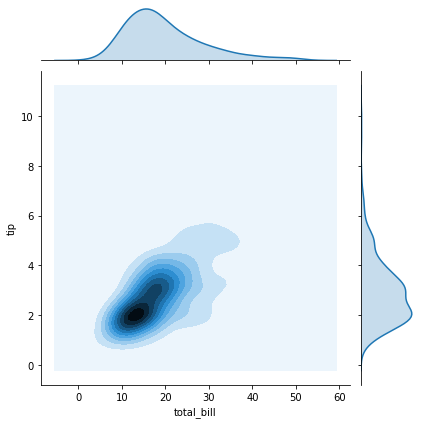

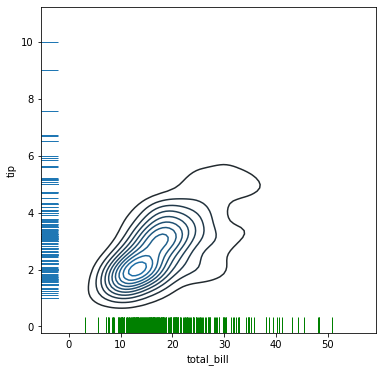

In [24]:
sns.jointplot(x="total_bill", y="tip", data=tips_ds, kind="kde")

fig, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(tips_ds.total_bill, tips_ds.tip, ax=ax)
sns.rugplot(tips_ds.total_bill, color="g", ax=ax)
sns.rugplot(tips_ds.tip, vertical=True, ax=ax)

So far we've represented discrete levels, but money changes in small enough intervals where its probably better to visualize it as if it was a continuous distribution.

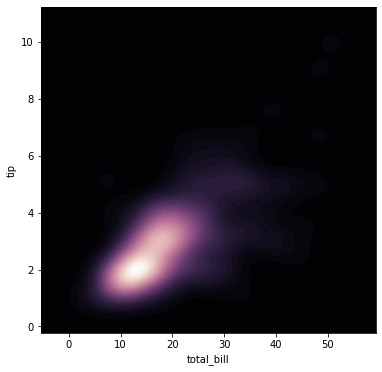

In [25]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(tips_ds.total_bill, tips_ds.tip, cmap=cmap, n_levels=60, shade=True)

## Categorical 

There's a few things we can do to explore our data's categorys.
* Scatter plots:
    * `stripplot()`
    * `swarmplot()`
* Distribution plots
    * `boxplot()`
    * `violinplot()`
    * `boxenplot()`
* Estimate plots
    * `pointplot()`
    * `barplot()`
    * `countplot()`

### Scatter plots

* `stripplot()`
* `swarmplot()`

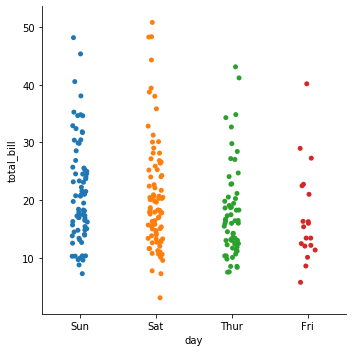

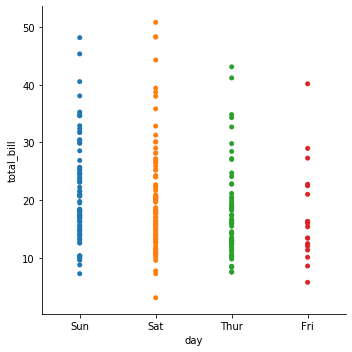

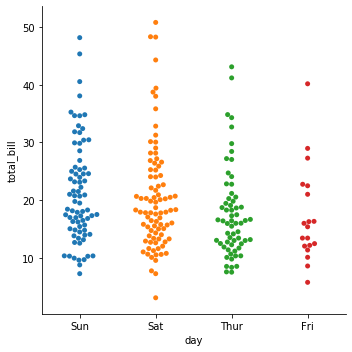

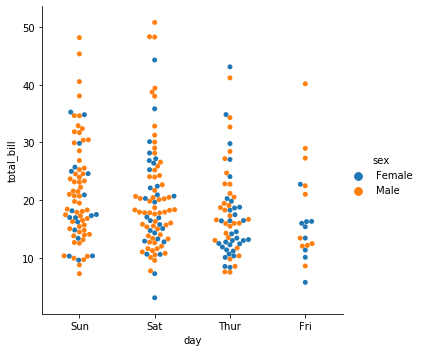

In [26]:
sns.catplot(x="day", y="total_bill", data=tips_ds) # Standard Strip Plot
sns.catplot(x="day", y="total_bill", jitter=False, data=tips_ds) # Removes random X-axis noise
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips_ds) # Swarm Plot
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips_ds) # Recolors to add a new dimension

Histograms will give us better insight into how many values are in a specific category, Unlike histograms, Scatter plots give us 2+ dimensions of data. We lose some information as now the number of data points in categlories is no longer explicitly stated, but we can see how a different feature is distributed in those categories.

### Distribution plots

* `boxplot()`
* `violinplot()`
* `boxenplot()`

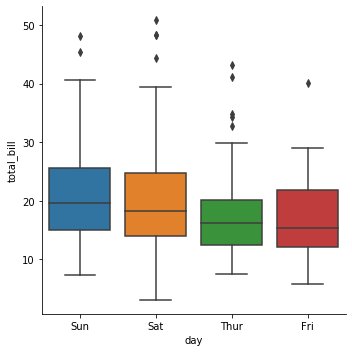

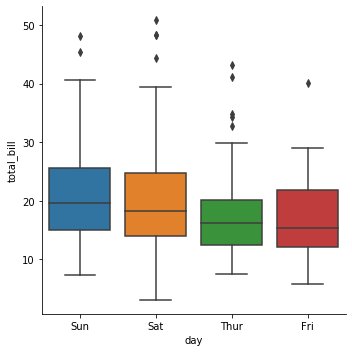

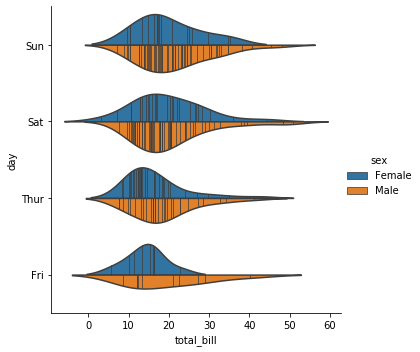

In [27]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips_ds)
sns.catplot(x="day", y="total_bill", kind="box", data=tips_ds)
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", split=True, inner="stick", data=tips_ds)

## Estimate Plots
* `pointplot()`
* `barplot()`
* `countplot()`

barplots and countplots are simpler ways of implementing the same functions as a bar catplot, what you need (control vs simlicity) determines which one you pick.

In [ ]:
sns.catplot(x="day", kind="count", hue="smoker", palette="ch:.25", data=tips_ds)

In [ ]:
sns.catplot(x="day", y="total_bill", kind="bar", data=tips_ds)
sns.catplot(x="day", y="tip", kind="bar", data=tips_ds)

# by default these black lines represent our confidence interfval, which we can remove with "ci=None".
# the default uses the standard deviation

## Regressions

In [ ]:
sns.regplot(x="total_bill", y="tip", data=tips_ds)
sns.lmplot(x="total_bill", y="tip", data=tips_ds)

Other than the shape of our charts `sns.regplot()` and `sns.lmplot()` create some similar linear regressions. Thats normal as `sns.regplot()` combines `sns.regplot()` with a `FacetGrid`. This basically means with `sns.lmplot()` we can explore relationships between more than two variables.

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips_ds)

We should make this a bit easier to parse however.

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips_ds, markers=["o", "x"], palette="Set1")

And exploring different variables...

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips_ds, markers=["o", "x"], palette="Set1")

We can use a joint plot to get a bit more information out.

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips_ds, kind="reg")


Sometimes we have data where a linear regression doesnt quite make sense though:

### Nonlinear Regressions

In [ ]:
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"), order=2)
sns.lmplot(x="size", y="total_bill", data=tips_ds, x_estimator=np.mean, logx=True)

## Data Cleanup

We sometimes will have outliers in our data, while we will want to show those outliers, we may not want to include them in our regression

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), ci=None)
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"), robust=True, ci=None, scatter_kws={"s": 80})

## Resources

https://datasetsearch.research.google.com
